In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
import mcmc_funcs

In [102]:
shaefer_data = False
if shaefer_data:
    _ = np.genfromtxt('../data/data-from-schaefer-paper.csv', unpack=True, skip_header=1, delimiter=',')
    x = _[0]
    y = _[4]
    yerr = _[5]

else:
    snum = 44
    df = pd.read_csv('../data/series/series-{}.csv'.format(snum))
    q = Time(df.ExposureDate, format='jd')
    q.format = 'decimalyear'
    x = q.value
    y = df.magcal_magdep
    yerr = df.magcal_local_rms

In [105]:
sampler = mcmc_funcs.mcmc(x, y, yerr, print_output=True, nwalkers=250, nsamp=300)

MCMC result:
            m = -0.020738923603165153 +8.54224211651114e-05 -0.00012455598294583425
            b = 52.44440089963006 +9.472547252897812e-05 -0.0001042543729568024
            f = 7.80055164384629e-34 +7.798616977528856e-38 -8.6530581083856e-38
            


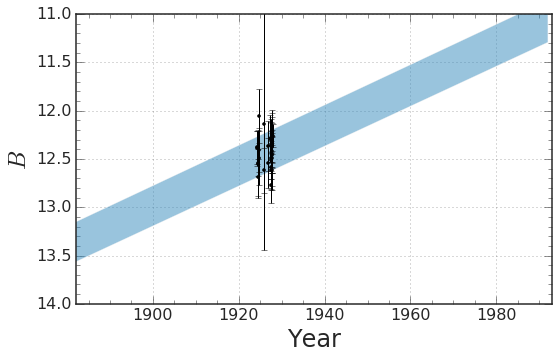

In [106]:
fig = mcmc_funcs.plot_samples(sampler, [x,y,yerr], burnin=2000,sampsize=300, fill=True)
#fig.axes[0].set_xlim(2414773,2434255)
#axes[0].set_xlim(2414773.814902,2434255.624359)
fig.axes[0].set_ylim(14,11)
fig.savefig('../figs/series/series-{}.png'.format(snum), dpi=150)

array([ 1924.27950955,  1924.32311355,  1924.41607817,  1924.52507326,
        1924.54967062,  1924.65607567,  1924.66690276,  1924.71883715,
        1925.78631558,  1925.87943734,  1926.86291842,  1926.89304001,
        1927.26400161,  1927.43366784,  1927.47176169,  1927.51828629,
        1927.57313912,  1927.58937624,  1927.58950526,  1927.59493659,
        1927.60582104,  1927.62238626,  1927.67963674,  1927.70972403,
        1927.7289498 ,  1927.73175121,  1927.75904338,  1927.76165979,
        1927.76177552,  1927.82188818,  1927.82735622,  1927.88487207])